# `QSDsan` Workshop Complete Workbook <a class="anchor" id="top"></a>

- **Prepared by:**
    
    - [Yalin Li](https://qsdsan.readthedocs.io/en/latest/authors/Yalin_Li.html)

- **Covered topics:**

    - [0. Instructions](#s0)
    - [1. Systems, TEA, LCA, and MCDA](#s1)
    
        - [1.1. System set up](#s1.1)
        - [1.2. TEA and LCA](#s1.2)
        - [1.3. MCDA](#s1.3)
    
    - [2. Uncertainty and Sensitivity Analyses](#s2)
    - [3. Country-Specific Analysis](#s3)

To run this notebook in your browser, go to this [Binder page](https://mybinder.org/v2/gh/QSD-group/QSDsan-workshop/main).

## 0. Instructions <a class="anchor" id="s0"></a>
Detailed instructions on how to use Jupyter Notebook can be found [here](https://realpython.com/jupyter-notebook-introduction/) (there are many online, this is just one example).

The key things to know about is that you can run a cell using `shift`/`ctrl`/`cmd`+`enter` or the `▶`/`▶Run` button on the menu bar as below.
<img src='files/run.png' alt='run'/>

Remember that everything marked with "A" (e.g., `sysA`) is related to the pit latrine system and "B" is related to the urine-diverting dry toilet (UDDT) system.

Note that you need to install all the packages in "requirements.txt" (or clone the respective repositories) prior to running this notebook.

Have fun!

[Back to top](#top)

## 1. Systems, TEA, LCA, and MCDA <a class="anchor" id="s1"></a>

As we introduced earlier in this workshop, in this example we are from a community deciding which kind of toilets we would like to install.

We have two options: pit latrine or urine-diverting dry toilet (UDDT). The pit latrine is cheaper, but the excreta may leach into the environment, and the low emptying frequency of it leads to more organic degradation that releases CH4 and N2O. UDDT, on the other hand, has higher capital and operating costs, but it separates urine from the solid wastes, thus can recovery more nutrients (N, P, and K). It is also cleaned at a more higher frequency than the pit latrine, therefore releases much less greenhouse gases (GHGs).

For the sake of time, we have pre-constructed those examples, but you can find all the codes for this [workshop](https://github.com/QSD-Group/QSDsan-workshop) (and those for [QSDsan](https://github.com/QSD-Group/QSDsan)) on GitHub.

### 1.1. System setup <a class="anchor" id="s1.1"></a>

In [2]:
# Let's have a look at the system
# `sysA` is the system for pit latrine and `sysB` for UDDT
from systems import create_system
sysA = create_system('A')
sysB = create_system('B')

As we can see, for both systems we include the human excreta input units (`A1`, `B1`), the toilets (`A2`, `B2`), the transportation units (`A3`, `B3`&`B4`).

Additionally, the the crop application units (`A4`, `B5`&`B6`) are used to account for the handling loss of the nutrients in the excreta, fugitative mixers (`A5`&`A6`, `B7`&`B8`) are used to record how the fugitative CH4 and N2O, and the splitters (`A7`, `B9`&`B10`) are used for easy calculation of the nutrient recoveries.

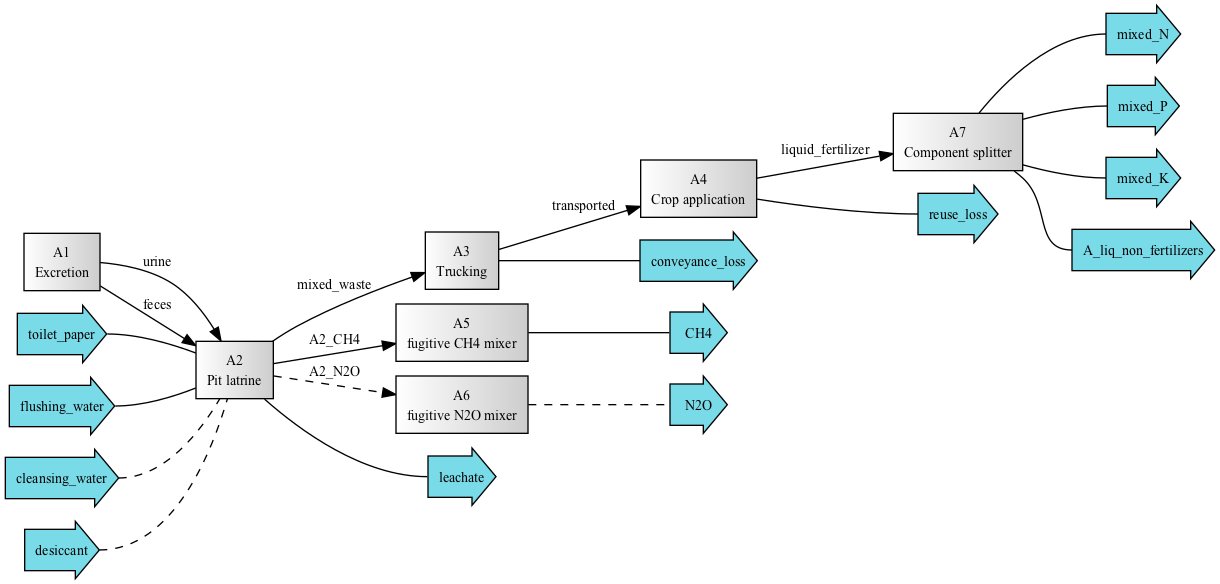

In [3]:
sysA.diagram()

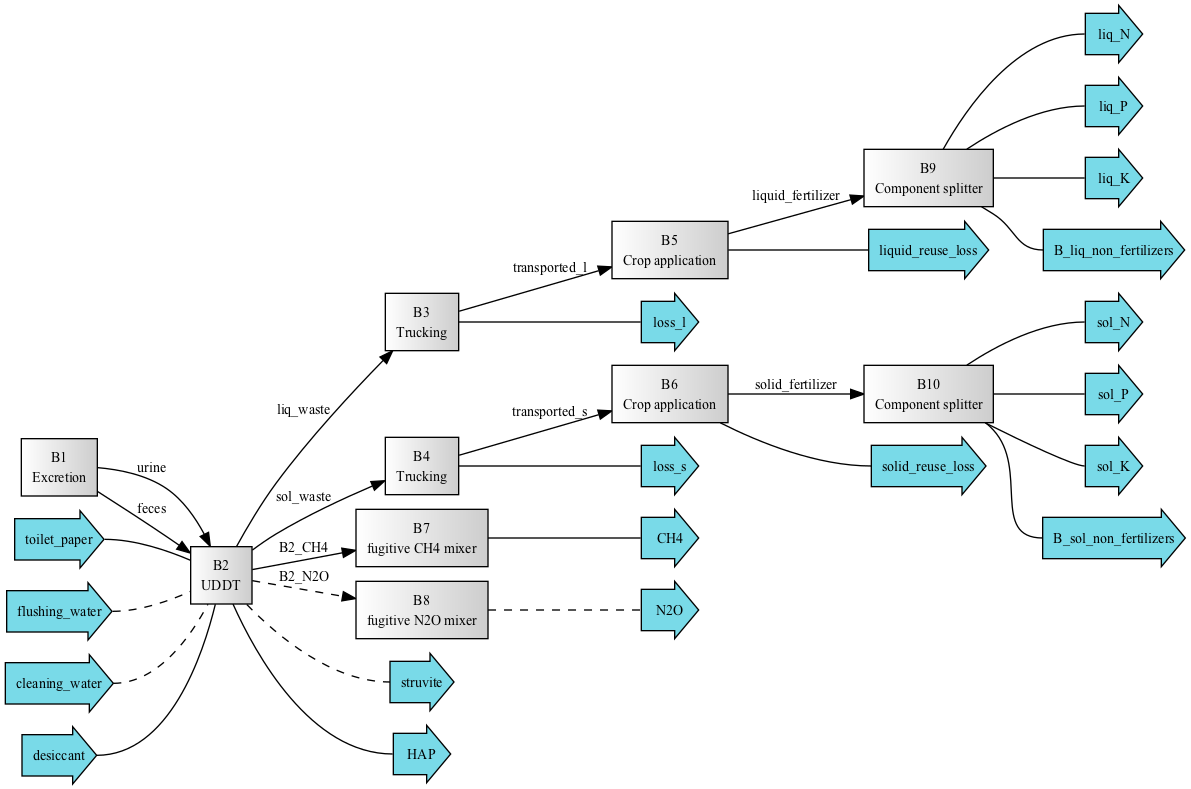

In [4]:
sysB.diagram()

[Back to top](#top)

### 1.2. TEA and LCA <a class="anchor" id="s1.2"></a>

In [5]:
# To get a quick peek of the results,
# the functions were premade for convenience
from systems import get_daily_cap_cost, get_daily_cap_ghg

In [6]:
# To look at cost of different categories
get_daily_cap_cost(system=sysA, kind='net', print_msg=True)
get_daily_cap_cost(system=sysA, kind='CAPEX', print_msg=True)
get_daily_cap_cost(system=sysA, kind='OPEX', print_msg=True)
get_daily_cap_cost(system=sysA, kind='sales', print_msg=True)

Daily net cost for sysA is ¢1.75/cap/d.
Daily CAPEX cost for sysA is ¢1.19/cap/d.
Daily OPEX cost for sysA is ¢1.03/cap/d.
Daily sales cost for sysA is ¢0.23/cap/d.


0.23205413355203575

In [7]:
# Same for `sysB`
get_daily_cap_cost(system=sysB, kind='net', print_msg=True)
get_daily_cap_cost(system=sysB, kind='CAPEX', print_msg=True)
get_daily_cap_cost(system=sysB, kind='OPEX', print_msg=True)
get_daily_cap_cost(system=sysB, kind='sales', print_msg=True)

Daily net cost for sysB is ¢3.37/cap/d.
Daily CAPEX cost for sysB is ¢1.47/cap/d.
Daily OPEX cost for sysB is ¢3.11/cap/d.
Daily sales cost for sysB is ¢0.38/cap/d.


0.380349705918588

In [8]:
# And the same goes for LCA results
get_daily_cap_ghg(system=sysA, kind='net', print_msg=True)
get_daily_cap_ghg(system=sysA, kind='capital', print_msg=True)
get_daily_cap_ghg(system=sysA, kind='operating', print_msg=True)
get_daily_cap_ghg(system=sysA, kind='transportation', print_msg=True) # operating = transportation+direct-offset
get_daily_cap_ghg(system=sysA, kind='direct', print_msg=True) # direct emission from CH4 and N2O
get_daily_cap_ghg(system=sysA, kind='offset', print_msg=True) # offset from N, P, and K

Daily net emission for sysA is 62.8 g CO2-e/cap/d.
Daily capital emission for sysA is 21.9 g CO2-e/cap/d.
Daily operating emission for sysA is 40.9 g CO2-e/cap/d.
Daily transportation emission for sysA is 0.7 g CO2-e/cap/d.
Daily direct emission for sysA is 60.6 g CO2-e/cap/d.
Daily offset emission for sysA is 20.4 g CO2-e/cap/d.


20.383607440442166

In [9]:
# `sysB`
get_daily_cap_ghg(system=sysB, kind='net', print_msg=True)
get_daily_cap_ghg(system=sysB, kind='capital', print_msg=True)
get_daily_cap_ghg(system=sysB, kind='operating', print_msg=True)
get_daily_cap_ghg(system=sysB, kind='transportation', print_msg=True)
get_daily_cap_ghg(system=sysB, kind='direct', print_msg=True)
get_daily_cap_ghg(system=sysB, kind='offset', print_msg=True)

Daily net emission for sysB is -5.2 g CO2-e/cap/d.
Daily capital emission for sysB is 32.5 g CO2-e/cap/d.
Daily operating emission for sysB is -37.7 g CO2-e/cap/d.
Daily transportation emission for sysB is 1.7 g CO2-e/cap/d.
Daily direct emission for sysB is 0.2 g CO2-e/cap/d.
Daily offset emission for sysB is 39.7 g CO2-e/cap/d.


39.727222435969

You can know much more about the systems using QSDsan, we cannot show them all here during to time limit, but you are welcome to checkout QSDsan's [documentation](https://qsdsan.readthedocs.io/en/latest/), which includes step-to-step tutorials to help you start from zero (you will find links to the YouTube demo videos in the tutorial).

In [10]:
# For example, you can do the following to know more about a unit
sysA.units

[<Excretion: A1>,
 <PitLatrine: A2>,
 <Trucking: A3>,
 <CropApplication: A4>,
 <Mixer: A5>,
 <Mixer: A6>,
 <ComponentSplitter: A7>]

In [11]:
flowsheetA = sysA.flowsheet
A2 = flowsheetA.unit.A2
A2.results()

Pit latrine                                      Units       A2
Design              Number of users per toilet               16
                    Parallel toilets                   1.25e+03
                    Emptying period                 yr      0.8
                    Single pit volume               m3     3.66
                    Single pit area                 m2      0.8
                    Single pit depth                 m     4.57
                    Cement                          kg 8.75e+05
                    Sand                            kg 3.97e+06
                    Gravel                          kg  1.6e+06
                    Brick                           kg 2.84e+05
                    Plastic                         kg 1.26e+04
                    Steel                           kg  4.2e+04
                    Wood                            m3      238
                    Excavation                      m3 4.57e+03
Purchase cost       Total toilets                  USD 5.61e+05
Total purchase cost                                USD 5.61e+05
Utility cost                                    USD/hr        0
Additional OPEX                                 USD/hr      3.2

In [12]:
# Or a stream
mixed_waste = A2.outs[0]
mixed_waste.show()

WasteStream: mixed_waste from <PitLatrine: A2> to <Trucking: A3>
 phase: 'l', T: 298.15 K, P: 101325 Pa
 flow (g/hr): NH3      1.01e+03
              NonNH3   1.28e+03
              P        685
              K        1.45e+03
              Mg       375
              Ca       1.82e+03
              H2O      5.62e+05
              OtherSS  4.25e+04
              Tissue   5.63e+03
 WasteStream-specific properties:
  pH         : 7.0
  COD        : 26682.4 mg/L
  TN         : 3632.2 mg/L
  TP         : 1090.2 mg/L
  TK         : 2310.2 mg/L
 Component concentrations (mg/L):
  NH3       1602.2
  NonNH3    2030.0
  P         1090.2
  K         2310.2
  Mg        597.0
  Ca        2892.0
  H2O       894155.8
  OtherSS   67687.6
  Tissue    8965.2


[Back to top](#top)

### 1.3. MCDA <a class="anchor" id="s1.3"></a>

In [13]:
# Assume we will make the decision based on TEA/LCA results
from systems import create_mcda, run_mcda
mcda = create_mcda((sysA, sysB))
run_mcda(mcda=mcda, econ_weight=0.4, print_msg=True) # environmental criterion weight will be 1-0.4=0.6

The score for sysA is 0.209, for sysB is 0.791, sysB is selected.


,sysA,sysB
0,0.209,0.791


In [14]:
# To look at the impact of criterion weight
econ_weights = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
scoresA = []
scoresB = []
for weight in econ_weights:
    score_df = run_mcda(mcda, econ_weight=weight, print_msg=False)
    scoresA.append(score_df.sysA.item())
    scoresB.append(score_df.sysB.item())

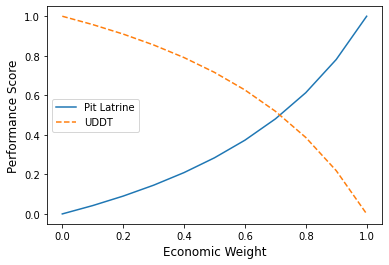

In [15]:
# Quick visualization
from matplotlib import pyplot as plt
plt.plot(econ_weights, scoresA, '-', label='Pit Latrine')
plt.plot(econ_weights, scoresB, '--', label='UDDT')
plt.xlabel('Economic Weight', fontsize=12)
plt.ylabel('Performance Score', fontsize=12)
plt.legend()

[Back to top](#top)

## 2. Uncertainty and Sensitivity Analyses <a class="anchor" id="s2"></a>

In [16]:
# To enable uncertainty and sensitivity analyses, we can use system models
from qsdsan import stats as s
from models import run_uncertainties, get_param_metric

In [17]:
modelA, modelB = run_uncertainties(N=10) # N is the number of samples we want to run

In [18]:
# To look at the uncertain parameters and result metrics included in the model
modelA.parameters

(<Parameter: [Excretion-A1] Excretion e cal (kcal/cap/d)>,
 <Parameter: [Excretion-A1] Excretion p veg (g/cap/d)>,
 <Parameter: [Excretion-A1] Excretion p anim (g/cap/d)>,
 <Parameter: [Excretion-A1] Excretion N prot (fraction)>,
 <Parameter: [Excretion-A1] Excretion P prot v (fraction)>,
 <Parameter: [Excretion-A1] Excretion P prot a (fraction)>,
 <Parameter: [Excretion-A1] Excretion K cal (g K/1000 kcal)>,
 <Parameter: [Excretion-A1] Excretion N exc (fraction of intake)>,
 <Parameter: [Excretion-A1] Excretion P exc (fraction of intake)>,
 <Parameter: [Excretion-A1] Excretion K exc (fraction of intake)>,
 <Parameter: [Excretion-A1] Excretion e exc (fraction of intake)>,
 <Parameter: [Excretion-A1] Excretion N ur (fraction of total)>,
 <Parameter: [Excretion-A1] Excretion P ur (fraction of total)>,
 <Parameter: [Excretion-A1] Excretion K ur (fraction of total)>,
 <Parameter: [Excretion-A1] Excretion e fec (fraction of total)>,
 <Parameter: [Excretion-A1] Excretion N ur NH3 (fraction of

In [19]:
modelA.metrics

(<Metric: [recovery] N recovery (fraction)>,
 <Metric: [recovery] P recovery (fraction)>,
 <Metric: [recovery] K recovery (fraction)>,
 <Metric: [TEA] Net cost (¢/cap/yr)>,
 <Metric: [TEA] CAPEX (¢/cap/yr)>,
 <Metric: [TEA] OPEX (¢/cap/yr)>,
 <Metric: [TEA] sales (¢/cap/yr)>,
 <Metric: [LCA] Net emission (g CO2-e/cap/d)>,
 <Metric: [LCA] Construction (g CO2-e/cap/d)>,
 <Metric: [LCA] Transportation (g CO2-e/cap/d)>,
 <Metric: [LCA] Direct (g CO2-e/cap/d)>,
 <Metric: [LCA] Offset (g CO2-e/cap/d)>)

In [20]:
modelA.table # the raw results

Element                  Excretion-A1                            \
Variable Excretion e cal [kcal/cap/d] Excretion p veg [g/cap/d]   
0                            2.06e+03                      42.6   
1                            2.05e+03                      38.4   
2                            2.32e+03                      43.5   
3                            2.26e+03                      43.9   
4                            2.01e+03                      41.5   
..                                ...                       ...   
95                           2.05e+03                      44.2   
96                           1.94e+03                      43.6   
97                           2.14e+03                      37.3   
98                           2.08e+03                      40.4   
99                           2.03e+03                      40.6   

Element                                                          \
Variable Excretion p anim [g/cap/d] Excretion N prot [fraction]   
0                              11.9                       0.141   
1                              13.1                       0.134   
2                              12.8                       0.134   
3                              12.2                       0.172   
4                              11.3                       0.153   
..                              ...                         ...   
95                             11.9                        0.14   
96                             13.4                       0.175   
97                             12.3                       0.158   
98                             12.7                       0.182   
99                             12.6                       0.181   

Element                                 ...                          LCA  \
Variable Excretion P prot v [fraction]  ... Net emission [g CO2-e/cap/d]   
0                               0.0436  ...                          125   
1                               0.0178  ...                         49.5   
2                               0.0236  ...                         61.1   
3                                 0.02  ...                         36.8   
4                               0.0085  ...                           46   
..                                 ...  ...                          ...   
95                              0.0205  ...                         66.7   
96                               0.036  ...                          106   
97                               0.009  ...                          128   
98                              0.0365  ...                         80.8   
99                              0.0263  ...                         82.7   

Element                                                               \
Variable Construction [g CO2-e/cap/d] Transportation [g CO2-e/cap/d]   
0                                23.7                           5.26   
1                                  20                          0.524   
2                                30.7                           5.82   
3                                21.2                           1.17   
4                                13.5                          0.217   
..                                ...                            ...   
95                                 10                          0.784   
96                               16.4                            2.2   
97                               10.5                          0.701   
98                               23.1                           1.72   
99                               40.2                           2.04   

Element                                                 
Variable Direct [g CO2-e/cap/d] Offset [g CO2-e/cap/d]  
0                           120                   23.7  
1                          41.5                   12.6  
2                          47.7                   23.1  
3                          33.8              

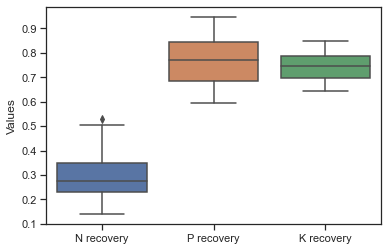

In [21]:
# QSDsan also has handy plotting functions to quickly visualize the results
recoveriesA = [get_param_metric(name, modelA, 'metric')
               for name in ('N recovery', 'P recovery', 'K recovery')]
fig, ax = s.plot_uncertainties(modelA, x_axis=recoveriesA)
fig

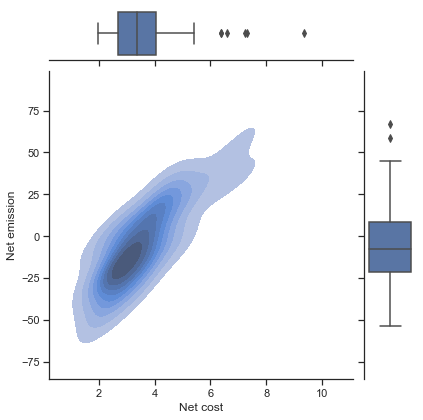

In [22]:
costB = get_param_metric('Net cost', modelB, 'metric')
emissionB = get_param_metric('Net emission', modelB, 'metric')
fig, ax = s.plot_uncertainties(modelB, x_axis=costB, y_axis=emissionB, kind='kde-box', center_kws={'fill': True})
fig

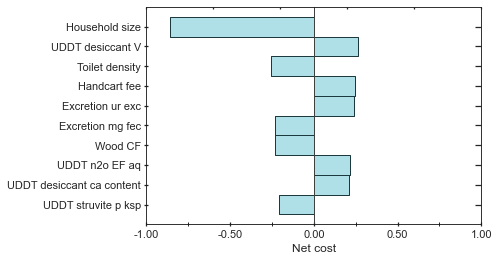

In [23]:
# Get Spearman's rank coefficients to see which parameters are the most important ones for the select metrics
cost_dfB = s.get_correlations(modelB, input_y=costB, kind='Spearman')[0]
fig, ax = s.plot_correlations(cost_dfB, top=10)
fig

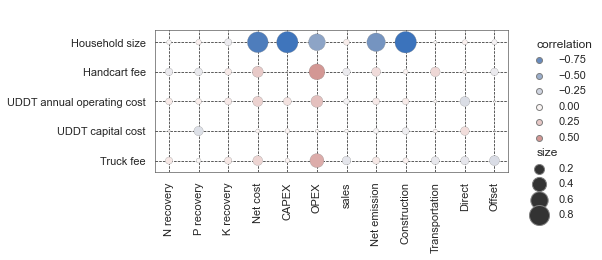

In [24]:
# Look at all the metrics at a time for select parameters
paramsB = [get_param_metric(name, modelB, 'parameter') for name in [
    'Household size',
    'Handcart fee',
    'UDDT annual operating cost',
    'UDDT capital cost',
    'UDDT desoccamt ca content',
]]

dfB = s.get_correlations(modelB, kind='Spearman')[0]
fig, ax = s.plot_correlations(dfB, parameters=paramsB)
fig

[Back to top](#top)

## 3. Country-Specific Analysis <a class="anchor" id="s3"></a>

Finally, what will happen if our community locates in a different place? Then we need to replace contextual parameters (e.g., diet, tax rate) in our analyses to those that are specific for the country of interest.

In [25]:
# For this analysis we considered the following parameters
from country_specific import country_params
# For each line, the key (left text) is the meaning of the parameter,
# the right text is the parameter name remembered by QSDsan
country_params

{'Caloric intake': 'Excretion e cal',
 'Vegetable protein intake': 'Excretion p veg',
 'Animal protein intake': 'Excretion p anim',
 'N fertilizer price': 'N fertilizer price',
 'P fertilizer price': 'P fertilizer price',
 'K fertilizer price': 'K fertilizer price',
 'Food waste ratio': 'Food waste ratio',
 'Price level ratio': 'Price level ratio',
 'Income tax': 'Income tax'}

In [26]:
# You can look up the values for a certain country
from country_specific import get_val_df
get_val_df('US')

,Parameter,Value,Unit
0,Caloric intake,3.78e+03,kcal/cap/d
1,Vegetable protein intake,40.3,g/cap/d
2,Animal protein intake,73.5,g/cap/d
3,N fertilizer price,1.33,USD/kg N
4,P fertilizer price,4,USD/kg P
5,K fertilizer price,1.35,USD/kg K
6,Food waste ratio,0.22,fraction
7,Price level ratio,1,
8,Income tax,0.21,fraction


In [29]:
# And here are the results with those country-specific parameters
from models import create_model
from country_specific import get_results
modelA = create_model('A', country_specific=True)
modelB = create_model('B', country_specific=True)
results = get_results('US', models=(modelA, modelB))
results['sysA']

recovery  N recovery [fraction]             0.44
          P recovery [fraction]            0.788
          K recovery [fraction]            0.759
TEA       Net cost [¢/cap/yr]               2.66
          CAPEX [¢/cap/yr]                  1.93
          OPEX [¢/cap/yr]                   1.29
          sales [¢/cap/yr]                 0.373
LCA       Net emission [g CO2-e/cap/d]      86.5
          Construction [g CO2-e/cap/d]      35.3
          Transportation [g CO2-e/cap/d]   0.718
          Direct [g CO2-e/cap/d]            86.5
          Offset [g CO2-e/cap/d]              36
dtype: float64

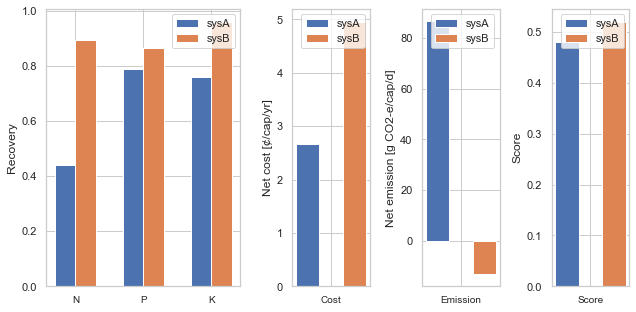

In [30]:
# To do a side-by-side comparison with the Uganda results
# the results might be different from the ones we see above
# as we are using the average data from Uganda
from country_specific import plot
fig = plot(results, mcda=mcda, econ_weight=0.7)

[Back to top](#top)